In [2]:
from sentence_transformers import SentenceTransformer, util
from sklearn.cluster import KMeans
import pandas as pd  
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import seaborn as sns
import numpy as np


In [5]:
embedder = SentenceTransformer('all-MiniLM-L6-v2')

In [7]:
corpus = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'A man is eating pasta.',
          'The girl is carrying a baby.',
          'The baby is carried by the woman',
          'A man is riding a horse.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.',
          'A cheetah is running behind its prey.',
          'A cheetah chases prey on across a field.'
          ]

d_c_2 = pd.DataFrame(corpus)
corpus_embeddings = embedder.encode(corpus)

# Perform kmean clustering
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])
print(clustered_sentences)
center_2 = clustering_model.cluster_centers_
for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

[['The girl is carrying a baby.', 'The baby is carried by the woman'], ['A man is eating food.', 'A man is eating a piece of bread.', 'A man is eating pasta.'], ['A cheetah is running behind its prey.', 'A cheetah chases prey on across a field.'], ['A man is riding a horse.', 'A man is riding a white horse on an enclosed ground.'], ['A monkey is playing drums.', 'Someone in a gorilla costume is playing a set of drums.']]
Cluster  1
['The girl is carrying a baby.', 'The baby is carried by the woman']

Cluster  2
['A man is eating food.', 'A man is eating a piece of bread.', 'A man is eating pasta.']

Cluster  3
['A cheetah is running behind its prey.', 'A cheetah chases prey on across a field.']

Cluster  4
['A man is riding a horse.', 'A man is riding a white horse on an enclosed ground.']

Cluster  5
['A monkey is playing drums.', 'Someone in a gorilla costume is playing a set of drums.']



For n_clusters = 2 The average silhouette_score is : 0.1585738
[1 1 1 0 0 1 1 0 0 0 0]
For n_clusters = 3 The average silhouette_score is : 0.24537095
[0 0 0 1 1 0 0 2 2 2 2]
For n_clusters = 4 The average silhouette_score is : 0.33365864
[0 0 0 2 2 3 3 1 1 1 1]
For n_clusters = 5 The average silhouette_score is : 0.4417197
[1 1 1 3 3 2 2 4 4 0 0]
For n_clusters = 6 The average silhouette_score is : 0.37375802
[5 5 1 3 3 2 2 4 4 0 0]
For n_clusters = 7 The average silhouette_score is : 0.3068303
[5 5 1 3 3 2 2 6 4 0 0]
For n_clusters = 8 The average silhouette_score is : 0.22742389
[5 5 0 2 2 4 6 7 1 3 3]
For n_clusters = 9 The average silhouette_score is : 0.19289027
[5 7 1 2 2 3 8 6 4 0 0]
For n_clusters = 10 The average silhouette_score is : 0.09983247
[5 7 1 2 9 3 8 6 4 0 0]


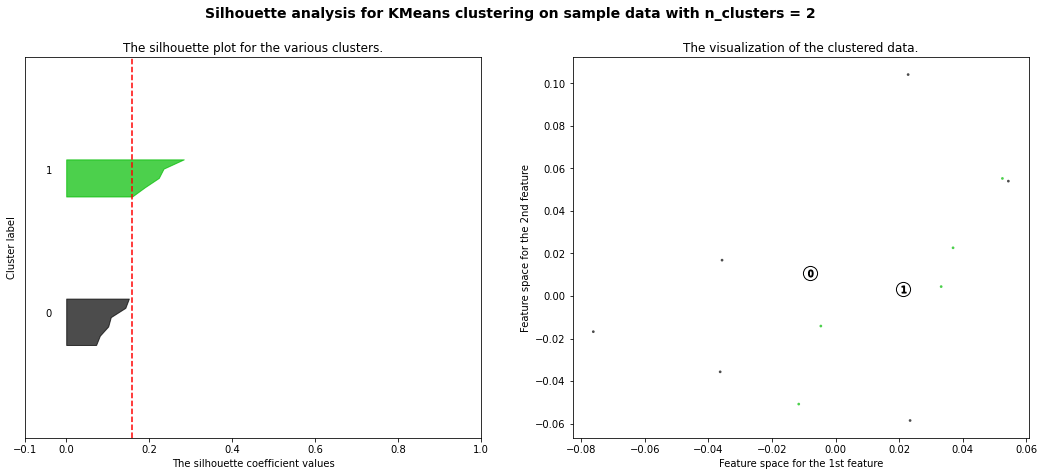

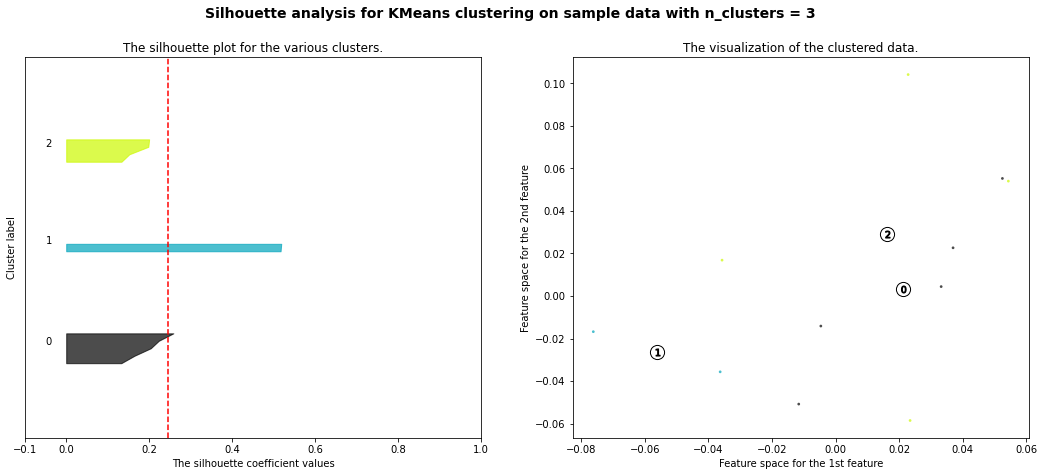

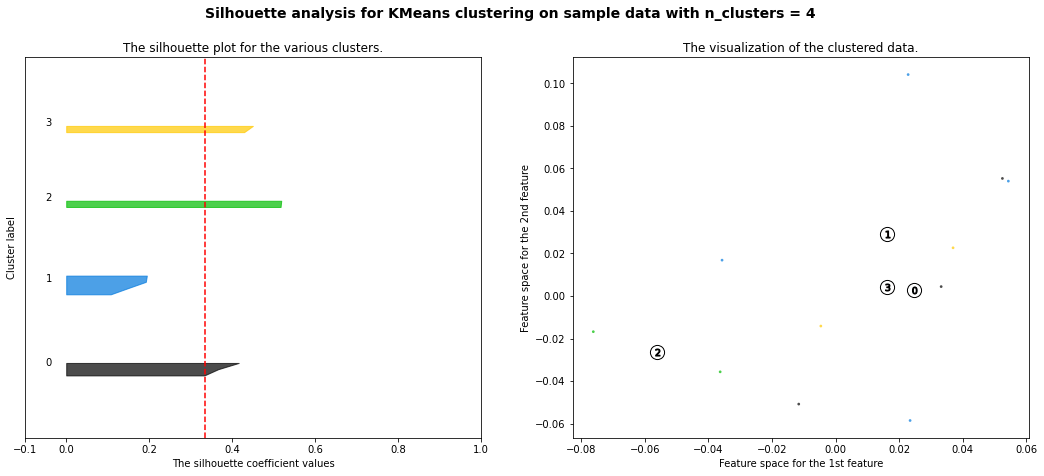

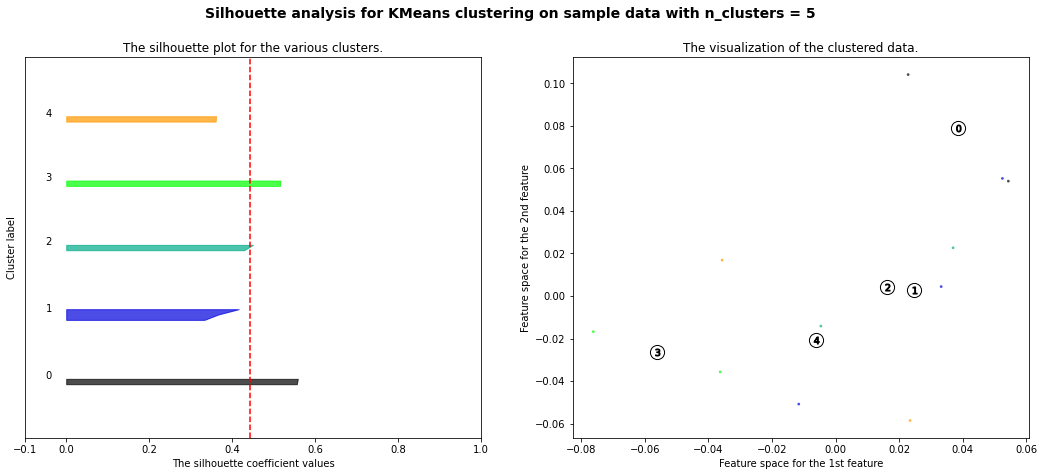

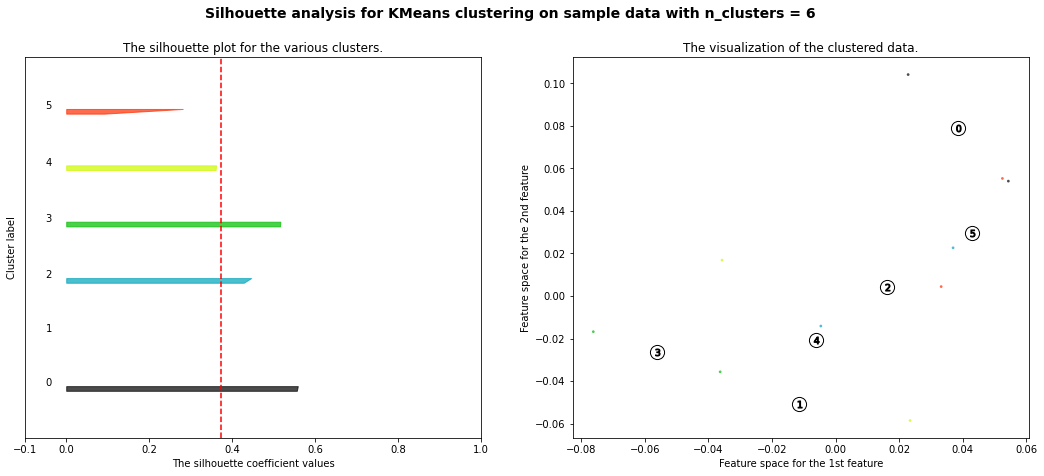

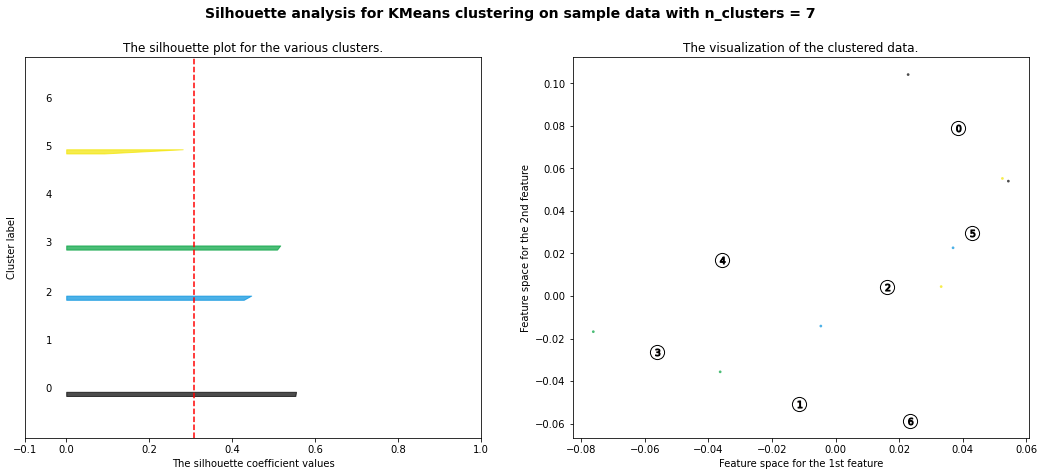

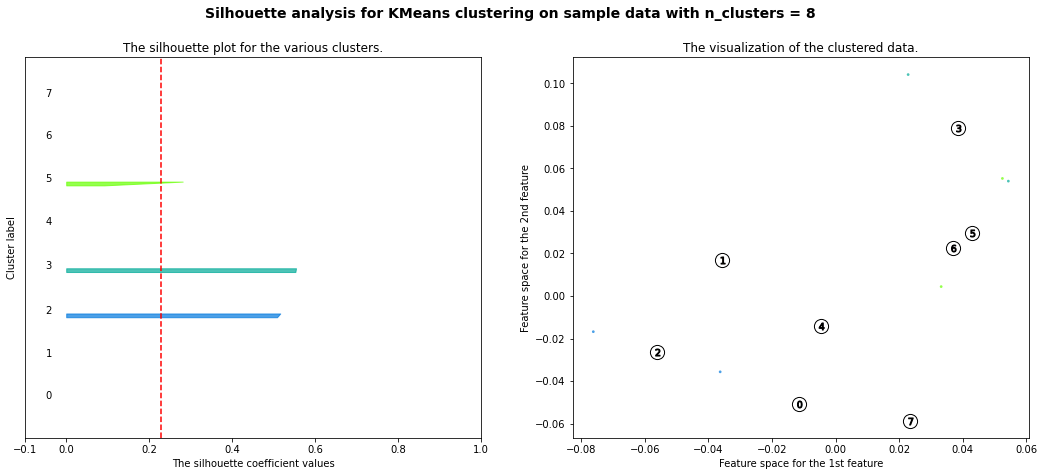

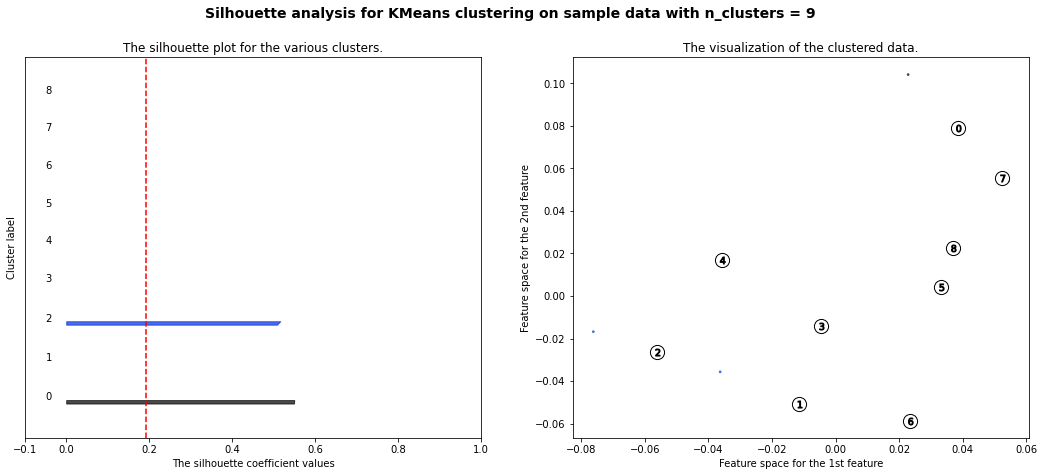

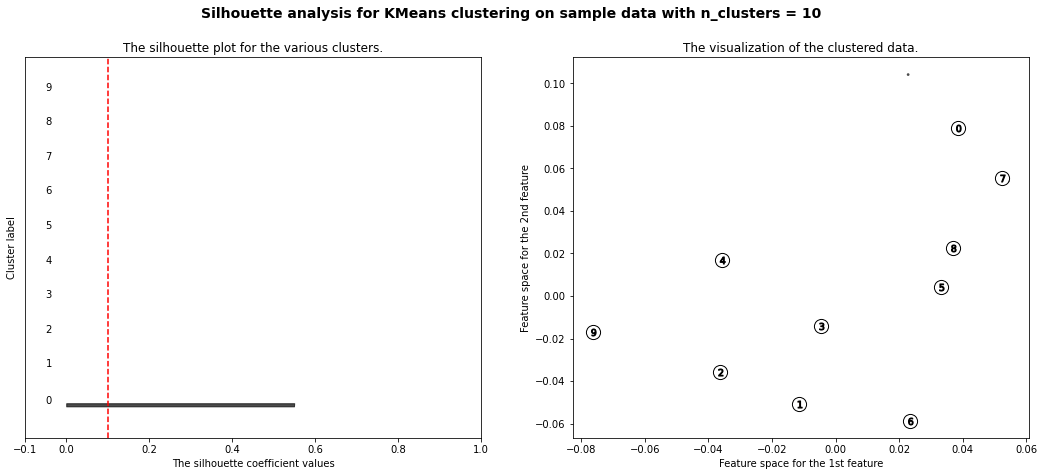

best avg:  0.4417197
best k:  5


In [8]:
average_best = 0
best_k = 0
for k in range(2,11):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(corpus_embeddings) + (k + 1) * 10])

    clusterer = KMeans(n_clusters=k, init="k-means++", random_state=10)
    cluster_labels = clusterer.fit_predict(corpus_embeddings)

    silhouette_avg = silhouette_score(corpus_embeddings, cluster_labels)
    if(silhouette_avg > average_best): 
        average_best = silhouette_avg
        best_k = k
        d_c_2['clusters'] = cluster_labels
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
    print(cluster_labels)

    #print(cluster_labels)

    sample_silhouette_values = silhouette_samples(corpus_embeddings, cluster_labels)

    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / k)
    ax2.scatter(corpus_embeddings[:, 0], corpus_embeddings[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')      

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % k),
                 fontsize=14, fontweight='bold')

plt.show()
print("best avg: ", average_best)
print("best k: ", best_k)

In [9]:
d_c_2

,0,clusters
0,A man is eating food.,1
1,A man is eating a piece of bread.,1
2,A man is eating pasta.,1
3,The girl is carrying a baby.,3
4,The baby is carried by the woman,3
5,A man is riding a horse.,2
6,A man is riding a white horse on an enclosed g...,2
7,A monkey is playing drums.,4
8,Someone in a gorilla costume is playing a set ...,4
9,A cheetah is running behind its prey.,0


In [12]:
d_c_2['clusters'] = ['cluster_' + str(cluster) for cluster in d_c_2['clusters']]
d_c_2.sort_values(by = ['clusters'])

,0,clusters
9,A cheetah is running behind its prey.,cluster_0
10,A cheetah chases prey on across a field.,cluster_0
0,A man is eating food.,cluster_1
1,A man is eating a piece of bread.,cluster_1
2,A man is eating pasta.,cluster_1
5,A man is riding a horse.,cluster_2
6,A man is riding a white horse on an enclosed g...,cluster_2
3,The girl is carrying a baby.,cluster_3
4,The baby is carried by the woman,cluster_3
7,A monkey is playing drums.,cluster_4
